# Rosetta Code Snips
Van der corput sequence.

This is useful when you need an even distribution of random-ish numbers.

In [157]:
import numpy as np
import matplotlib.pyplot as plt
import math
from fractions import Fraction
import random
import string
import pylab as P

%matplotlib inline

The goal is to show a set of binary numbers from 1 to n, reverse them and then print them.

for example
0.
1.
10.
11.

becomes
.0
.1
.01
.11

In [149]:
numberOfValues = 2500

We start by creating a set of random values.  The length of the array will be how ever many values were specified above.

In [150]:
randVal = [random.random() for x in range(numberOfValues)]

### Creating a function for VDC

The vdc value should be the reversed binary value multiplied by the inverse base.  

This means the array will be multiplied by [1/2, 1/4, 1/8, 1/16...] for base 2.

The function below will determine the remainder and recursively go through the list.

VDC is the cumulative value.

In [151]:
# create a function to convert into any base up to 10

digs = string.digits

def reversedBase(number, base):
    # find the sign of the number
    finalArray = []
    vdc = 0
    if number < 0: 
        sign = -1
    elif number == 0: 
        return 0
    elif number > 0:
        sign = 1
    
    i=1
    while number:
        # append the remainder of the number divided by the base
        # we created the digs array above and populated it with only integers at this point
        nTimes, remainder = divmod(number, base) 
        finalArray.append(digs[remainder])
        number /= base
        vdc += remainder / float(base**i)
        # print "remainder:" + str(remainder)
        # print "vdc:" + str(vdc)
        # print "i:" + str(i)
        # print "number:" + str(number)
        i += 1

        
    #return ''.join(finalArray)
    return vdc

In [178]:
# Simple testing function to make sure it works correctly

Fraction.__repr__ = lambda x: '%i/%i' % (x.numerator, x.denominator)

print [Fraction(reversedBase(x,2)) for x in range(10)]
print [Fraction(reversedBase(x,4)) for x in range(10)]

[0/1, 1/2, 1/4, 3/4, 1/8, 5/8, 3/8, 7/8, 1/16, 9/16]
[0/1, 1/4, 1/2, 3/4, 1/16, 5/16, 9/16, 13/16, 1/8, 3/8]


In [179]:
vdc = [reversedBase(x, 2) for x in range(numberOfValues)]

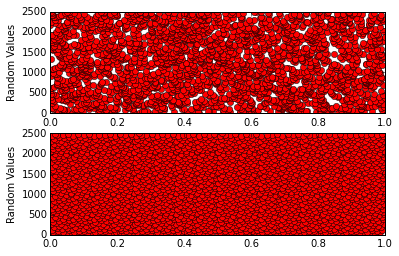

In [180]:
plt.figure(1)
plt.subplot(211)
plt.plot(randVal, range(numberOfValues), 'ro')
plt.ylabel('Random Values')
plt.subplot(212)
plt.plot(vdc, range(numberOfValues), 'ro')
plt.ylabel('Random Values')
plt.show()

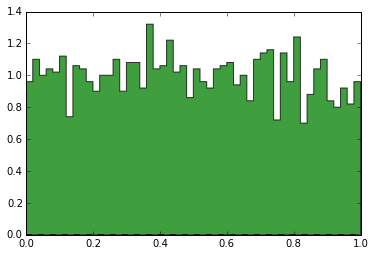

In [162]:
# the histogram of the data with histtype='step'
n, bins, patches = P.hist(randVal, 50, normed=1, histtype='stepfilled')
P.setp(patches, 'facecolor', 'g', 'alpha', 0.75)

# add a line showing the expected distribution
y = P.normpdf( bins, mu, sigma)
l = P.plot(bins, y, 'k--', linewidth=1.5)


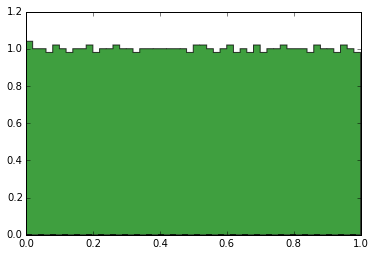

In [161]:

# the histogram of the data with histtype='step'
n, bins, patches = P.hist(vdc, 50, normed=1, histtype='stepfilled')
P.setp(patches, 'facecolor', 'g', 'alpha', 0.75)

# add a line showing the expected distribution
y = P.normpdf( bins, mu, sigma)
l = P.plot(bins, y, 'k--', linewidth=1.5)

## Here we stack the two histograms on top of each other

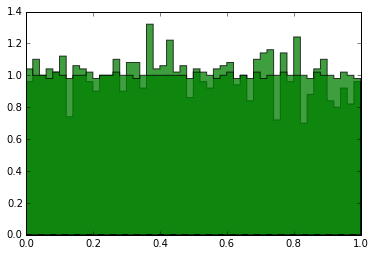

In [163]:
# the histogram of the data with histtype='step'
n, bins, patches = P.hist(randVal, 50, normed=1, histtype='stepfilled')
P.setp(patches, 'facecolor', 'g', 'alpha', 0.75)

# add a line showing the expected distribution
y = P.normpdf( bins, mu, sigma)
l = P.plot(bins, y, 'k--', linewidth=1.5)

# the histogram of the data with histtype='step'
n, bins, patches = P.hist(vdc, 50, normed=1, histtype='stepfilled')
P.setp(patches, 'facecolor', 'g', 'alpha', 0.75)

# add a line showing the expected distribution
y = P.normpdf( bins, mu, sigma)
l = P.plot(bins, y, 'k--', linewidth=1.5)


It is clear from these two histograms how much more evenly distributed the VDC value is over a "random" value